In [1]:
# default_exp calib

# Calib
> calibration tools for UVIS

In [6]:
# export
import warnings

import pandas as pd
from planetarypy.utils import nasa_datetime_to_iso
from pyuvis.io import UVPDS

warnings.filterwarnings(
    "ignore"
)  # , message='Image dimension nx is  not evenly sampled to relative tolerance')

In [7]:
# export
steffl_spica_dates = ["2001-04-3", "2002-07-17", "2003-05-19"]

## Star list from Greg

In [8]:
# export
def get_star_obs():
    "Read Greg's file into dataframe and add some meta-columns."
    star_list = Path(
        "/home/maye/Dropbox/Documents/projects/uvis_pdart/calib/stars_list.txt"
    )
    star_obs = pd.read_table(
        star_list, sep="\s\s+", index_col=False, engine="python"
    )  # engine kw to avoid warning

    star_obs["DET"] = star_obs.filename.str[:3]
    star_obs["DATETIME"] = star_obs.filename.map(
        lambda x: nasa_datetime_to_iso(
            x[3:20].replace("_", "-", 1).replace("_", "T", 1).replace("_", ":")
        )
    )
    star_obs.DATETIME = pd.to_datetime(star_obs.DATETIME)
    star_obs["DATE"] = pd.DatetimeIndex(star_obs.DATETIME.dt.date)
    return star_obs


def get_spica_obs():
    "Filter Greg's list for Spica (alp vir) obs."
    return get_star_obs().query("name=='alp vir'")


def filter_spica_for_date(datestr):
    return get_spica_obs().query("DATE==@datestr")

In [6]:
get_spica_obs().groupby("DATE").size()

DATE
1999-01-16    52
1999-01-17    50
2001-04-03     6
2001-10-26    14
2001-10-27     4
              ..
2016-02-13     8
2016-07-13    36
2017-01-13     2
2017-06-21    14
2017-06-22    12
Length: 75, dtype: int64

In [7]:
filter_spica_for_date(steffl_spica_dates[1])

filename  slit    nx  ny    nz  \
130  EUV2002_198_03_26_54_UVIS_C33ST_SPICARAST002_P...     2     2  64  3232   
131  EUV2002_198_04_32_26_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
132  EUV2002_198_05_28_38_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
133  EUV2002_198_06_24_49_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
134  EUV2002_198_07_21_01_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
135  EUV2002_198_08_17_13_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
136  EUV2002_198_09_13_25_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
137  EUV2002_198_10_09_38_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
138  EUV2002_198_11_05_50_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
139  EUV2002_198_12_02_01_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
140  EUV2002_198_12_58_13_UVIS_C33ST_SPICARAST002_P...     2  1024  64     3   
141  EUV2002_198_13_14_49_UVIS_C33ST_SPICARAST002_P...     2  1024  64     7   
142  EUV2002_198_13_54_25_UVIS_C33ST_SPICARAST002_P...     2  1024  64    10   
807  FUV2002_198_03_26_54_UVIS_C33ST_SPICARAST002_P...     1     2  64  3232   
808  FUV2002_198_04_32_26_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
809  FUV2002_198_05_28_38_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
810  FUV2002_198_06_24_49_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
811  FUV2002_198_07_21_01_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
812  FUV2002_198_08_17_13_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
813  FUV2002_198_09_13_25_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
814  FUV2002_198_10_09_38_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
815  FUV2002_198_11_05_50_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
816  FUV2002_198_12_02_01_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   
817  FUV2002_198_12_58_13_UVIS_C33ST_SPICARAST002_P...     1  1024  64     3   
818  FUV2002_198_13_14_49_UVIS_C33ST_SPICARAST002_P...     1  1024  64     7   
819  FUV2002_198_13_54_25_UVIS_C33ST_SPICARAST002_P...     1  1024  64    10   

     int  odcid  x1    x2  y1  y2     name  DET            DATETIME       DATE  
130    1    121   0  1023   0  63  alp vir  EUV 2002-07-17 03:26:54 2002-07-17  
131  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 04:32:26 2002-07-17  
132  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 05:28:38 2002-07-17  
133  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 06:24:49 2002-07-17  
134  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 07:21:01 2002-07-17  
135  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 08:17:13 2002-07-17  
136  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 09:13:25 2002-07-17  
137  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 10:09:38 2002-07-17  
138  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 11:05:50 2002-07-17  
139  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 12:02:01 2002-07-17  
140  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 12:58:13 2002-07-17  
141  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 13:14:49 2002-07-17  
142  332    120   0  1023   0  63  alp vir  EUV 2002-07-17 13:54:25 2002-07-17  
807    1    121   0  1023   0  63  alp vir  FUV 2002-07-17 03:26:54 2002-07-17  
808  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 04:32:26 2002-07-17  
809  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 05:28:38 2002-07-17  
810  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 06:24:49 2002-07-17  
811  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 07:21:01 2002-07-17  
812  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 08:17:13 2002-07-17  
813  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 09:13:25 2002-07-17  
814  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 10:09:38 2002-07-17  
815  332    120   0  1023   0  63  alp vir  FUV 2002-07-17 11:05:50 2002-07-17  
816  332    120   0  1

In [8]:
obsids = filter_spica_for_date(steffl_spica_dates[1]).filename.values
obsids

array(['EUV2002_198_03_26_54_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_04_32_26_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_05_28_38_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_06_24_49_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_07_21_01_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_08_17_13_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_09_13_25_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_10_09_38_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_11_05_50_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_12_02_01_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_12_58_13_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_13_14_49_UVIS_C33ST_SPICARAST002_PRIME',
       'EUV2002_198_13_54_25_UVIS_C33ST_SPICARAST002_PRIME',
       'FUV2002_198_03_26_54_UVIS_C33ST_SPICARAST002_PRIME',
       'FUV2002_198_04_32_26_UVIS_C33ST_SPICARAST002_PRIME',
       'FUV2002_198_05_28_38_UVIS_C33ST_SPICARAST002_PRIME',
       'FUV2002_198_06_2

In [10]:
for id in obsids:
    try:
        data = UVPDS(id)
    except FileNotFoundError:
        print(id, "not there.")
    else:
        print("Got", id)

Got EUV2002_198_03_26_54_UVIS_C33ST_SPICARAST002_PRIME
EUV2002_198_04_32_26_UVIS_C33ST_SPICARAST002_PRIME not there.
Got EUV2002_198_05_28_38_UVIS_C33ST_SPICARAST002_PRIME
Got EUV2002_198_06_24_49_UVIS_C33ST_SPICARAST002_PRIME
EUV2002_198_07_21_01_UVIS_C33ST_SPICARAST002_PRIME not there.
EUV2002_198_08_17_13_UVIS_C33ST_SPICARAST002_PRIME not there.
EUV2002_198_09_13_25_UVIS_C33ST_SPICARAST002_PRIME not there.
Got EUV2002_198_10_09_38_UVIS_C33ST_SPICARAST002_PRIME
Got EUV2002_198_11_05_50_UVIS_C33ST_SPICARAST002_PRIME
EUV2002_198_12_02_01_UVIS_C33ST_SPICARAST002_PRIME not there.
EUV2002_198_12_58_13_UVIS_C33ST_SPICARAST002_PRIME not there.
Got EUV2002_198_13_14_49_UVIS_C33ST_SPICARAST002_PRIME
EUV2002_198_13_54_25_UVIS_C33ST_SPICARAST002_PRIME not there.
Got FUV2002_198_03_26_54_UVIS_C33ST_SPICARAST002_PRIME
FUV2002_198_04_32_26_UVIS_C33ST_SPICARAST002_PRIME not there.
Got FUV2002_198_05_28_38_UVIS_C33ST_SPICARAST002_PRIME
Got FUV2002_198_06_24_49_UVIS_C33ST_SPICARAST002_PRIME
FUV2002_1

In [125]:
import hvplot.xarray

kwargs = {"x": "nx", "y": "ny", "cmap": "viridis", "clim": (0, 50)}

In [62]:
d1 = UVPDS("EUV2002_198_04_31")
d2 = UVPDS(obsids[3])

In [146]:
d1.label

PVLModule([
  ('PDS_VERSION_ID', 'PDS3')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 131072)
  ('FILE_RECORDS', 10)
  ('PRODUCT_ID', 'EUV2002_198_04_31')
  ('SPACECRAFT_CLOCK_START_COUNT', '1/1405572559.96')
  ('SPACECRAFT_CLOCK_STOP_COUNT', 'UNK')
  ('START_TIME',
   datetime.datetime(2002, 7, 17, 4, 31, 59, 571000, tzinfo=datetime.timezone.utc))
  ('STOP_TIME',
   datetime.datetime(2002, 7, 17, 5, 27, 19, 571000, tzinfo=datetime.timezone.utc))
  ('DATA_SET_ID', 'CO-S-UVIS-2-CUBE-V1.2')
  ('TARGET_NAME', 'STAR')
  ('INSTRUMENT_HOST_NAME', 'CASSINI_ORBITER')
  ('INSTRUMENT_NAME', 'ULTRAVIOLET IMAGING SPECTROGRAPH')
  ('INSTRUMENT_ID', 'UVIS')
  ('OBSERVATION_ID', 24440)
  ('MISSION_PHASE_NAME', 'CRUISE')
  ('PRODUCT_CREATION_TIME', datetime.date(2012, 1, 25))
  ('INTEGRATION_DURATION', Quantity(value=332.0, units='SECOND'))
  ('COMPRESSION_TYPE', 'SQRT_9')
  ('HI_VOLTAGE_POWER_SUPPLY_STATE', 'ON')
  ('OCCULTATION_PORT_STATE', 'CLOSED')
  ('SLIT_STATE', 'OCCULTATION')
  ('TEST_

In [76]:
d1arr = d1.xarray.astype("int16")

In [77]:
d2arr = d2.xarray.astype("int16")

In [80]:
diff = d2arr - d1arr

## Background

In [113]:
background = d1arr.sel(ny=slice(50, 60), nx=slice(60, 70), nz=1, drop=True)
background

<xarray.DataArray 'EUV' (nx: 165, ny: 11)>
2 3 1 5 2 1 1 7 2 1 3 3 1 4 3 2 0 0 2 ... 2 2 3 3 3 3 2 0 2 5 4 3 2 3 1 3 2 3 2
Coordinates:
  * nx       (nx) float64 60.06 60.12 60.18 60.24 ... 69.81 69.87 69.93 69.99
  * ny       (ny) int64 50 51 52 53 54 55 56 57 58 59 60
Attributes:
    n_bands:               1024
    integration_duration:  Quantity(value=332.0, units='SECOND')

In [114]:
background.hvplot(x="nx", y="ny", aspect=2)

:Image   [nx,ny]   (EUV)

In [118]:
bps = background / 332

In [120]:
bps.hvplot.hist()

:NdOverlay   [Element]
   :Histogram   [EUV]   (EUV_count)

In [121]:
bps.mean()

<xarray.DataArray 'EUV' ()>
0.007636
Attributes:
    n_bands:               1024
    integration_duration:  Quantity(value=332.0, units='SECOND')

## Column-averaging

In [130]:
d1arr

<xarray.DataArray 'EUV' (nx: 1024, ny: 64, nz: 10)>
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0
Coordinates:
  * nx       (nx) float64 56.12 56.18 56.24 56.3 ... 118.0 118.0 118.1 118.2
  * ny       (ny) int64 0 1 2 3 4 5 6 7 8 9 10 ... 54 55 56 57 58 59 60 61 62 63
  * nz       (nz) int64 1 2 3 4 5 6 7 8 9 10
Attributes:
    n_bands:               1024
    integration_duration:  Quantity(value=332.0, units='SECOND')

In [147]:
averaged = d1arr.sel(ny=slice(2, 60)).mean(dim="ny")

In [148]:
averaged.hvplot(x="nx")

:DynamicMap   [nz]
   :Curve   [nx]   (EUV)

In [149]:
ff = d1arr / averaged

In [150]:
ff.hvplot(x="nx", y="ny", cmap="viridis")

:DynamicMap   [nz]
   :Image   [nx,ny]   (EUV)

In [154]:
integrated = d1arr.sum(dim="nz")
integrated.hvplot(x="nx", y="ny", cmap="viridis")

:Image   [nx,ny]   (EUV)

In [91]:
diff.hvplot(x="nx", y="ny", cmap="viridis", clim=(-100, 100))

:DynamicMap   [nz]
   :Image   [nx,ny]   (EUV)

In [94]:
d1.xarray.hvplot(x="nx", y="ny", cmap="viridis", clim=(0, 50))

:DynamicMap   [nz]
   :Image   [nx,ny]   (EUV)

In [93]:
d2.xarray.hvplot(x="nx", y="ny", cmap="viridis", clim=(0, 50))

:DynamicMap   [nz]
   :Image   [nx,ny]   (EUV)

In [26]:
(
    arr.hvplot(x="nx", y="ny", cmap="viridis", clim=(0, 50))
    + arr.hvplot.quadmesh(x="nx", y="ny", cmap="viridis", clim=(0, 50))
).cols(1)

:Layout
   .DynamicMap.I  :DynamicMap   [nz]
      :Image   [nx,ny]   (qube)
   .DynamicMap.II :DynamicMap   [nz]
      :QuadMesh   [nx,ny]   (qube)

In [20]:
euv.integration_duration

Quantity(value=332.0, units='SECOND')

In [18]:
diff = arr.nx.diff("nx")
diff.name = "diff"

In [19]:
diff.hvplot.hist()

:NdOverlay   [Element]
   :Histogram   [diff]   (diff_count)

In [52]:
fuv = FUV_PDS(UVISOpus(obsids[3][:-3]).local_label_path)

Found 1 obsids.


In [53]:
fuvarr = fuv.xarray

In [54]:
fuvarr.hvplot(x="nx", y="ny", clim=(0, 50), cmap="viridis")

:DynamicMap   [nz]
   :Image   [nx,ny]   (value)

In [35]:
euv.label

PVLModule([
  ('PDS_VERSION_ID', 'PDS3')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 131072)
  ('FILE_RECORDS', 29)
  ('PRODUCT_ID', 'EUV2001_093_08_35')
  ('SPACECRAFT_CLOCK_START_COUNT', '1/1364978874.96')
  ('SPACECRAFT_CLOCK_STOP_COUNT', 'UNK')
  ('START_TIME',
   datetime.datetime(2001, 4, 3, 8, 35, 20, 430000, tzinfo=datetime.timezone.utc))
  ('STOP_TIME',
   datetime.datetime(2001, 4, 3, 9, 4, 20, 430000, tzinfo=datetime.timezone.utc))
  ('DATA_SET_ID', 'CO-X-UVIS-2-CUBE-V1.2')
  ('TARGET_NAME', 'N/A')
  ('INSTRUMENT_HOST_NAME', 'CASSINI_ORBITER')
  ('INSTRUMENT_NAME', 'ULTRAVIOLET IMAGING SPECTROGRAPH')
  ('INSTRUMENT_ID', 'UVIS')
  ('OBSERVATION_ID', 5150)
  ('MISSION_PHASE_NAME', 'CRUISE')
  ('PRODUCT_CREATION_TIME', datetime.date(2012, 1, 31))
  ('INTEGRATION_DURATION', Quantity(value=60.0, units='SECOND'))
  ('COMPRESSION_TYPE', 'SQRT_9')
  ('HI_VOLTAGE_POWER_SUPPLY_STATE', 'ON')
  ('OCCULTATION_PORT_STATE', 'CLOSED')
  ('SLIT_STATE', 'OCCULTATION')
  ('TEST_PULSE_

## PDS Index

In [11]:
from planetarypy.pds.apps import get_index

In [12]:
pdsindex = get_index("cassini.uvis.indexes.index")

In [13]:
pdsindex.head()

FILE_NAME OBSERVATION_TYPE  \
0  /COUVIS_0001/DATA/D1999_007/HSP1999_007_16_53.LBL              NaN   
1  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_31...            UHDAC   
2  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_33...            UHDAC   
3  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_36...            UHDAC   
4  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_42...            UHDAC   

               START_TIME               STOP_TIME TARGET_NAME  \
0 1999-01-07 16:53:07.953 1999-01-07 16:55:08.185        STAR   
1 1999-01-07 16:31:07.962 1999-01-07 16:31:11.962         NaN   
2 1999-01-07 16:33:07.961 1999-01-07 16:33:11.961         NaN   
3 1999-01-07 16:36:13.960 1999-01-07 16:41:01.960         NaN   
4 1999-01-07 16:42:07.958 1999-01-07 16:42:11.958         NaN   

            DATA_SET_ID SPACECRAFT_CLOCK_START_COUNT  \
0  CO-J-UVIS-2-SSB-V1.2             1/1294419469.000   
1  CO-J-UVIS-2-SSB-V1.2             1/1294418149.000   
2  CO-J-UVIS-2-SSB-V1.2             1/1294418269.000   
3  CO-J-UVIS-2-SSB-V1.2             1/1294418455.000   
4  CO-J-UVIS-2-SSB-V1.2             1/1294418809.000   

  SPACECRAFT_CLOCK_STOP_COUNT  INTEGRATION_DURATION COMPRESSION_TYPE  ...  \
0                         UNK                   4.0             NONE  ...   
1                         UNK                -999.0             NONE  ...   
2                         UNK                -999.0             NONE  ...   
3                         UNK                -999.0             NONE  ...   
4                         UNK                -999.0             NONE  ...   

  SUB_SOLAR_LONGITUDE SUB_SPACECRAFT_LATITUDE SUB_SPACECRAFT_LONGITUDE  \
0              -999.0                  -999.0                   -999.0   
1              -999.0                  -999.0                   -999.0   
2              -999.0                  -999.0                   -999.0   
3              -999.0                  -999.0                   -999.0   
4              -999.0                  -999.0                   -999.0   

  PHASE_ANGLE  EMISSION_ANGLE  SOLAR_INCIDENCE_ANGLE  CENTRAL_BODY_DISTANCE  \
0      -999.0          -999.0                 -999.0                 -999.0   
1      -999.0          -999.0                 -999.0                 -999.0   
2      -999.0          -999.0                 -999.0                 -999.0   
3      -999.0          -999.0                 -999.0                 -999.0   
4      -999.0          -999.0                 -999.0                 -999.0   

                     DWELL_TIME  \
0 1969-12-31 23:59:59.999999001   
1 1970-01-01 00:00:00.000000001   
2 1970-01-01 00:00:00.000000001   
3 1970-01-01 00:00:00.000000072   
4 1970-01-01 00:00:00.000000001   

                                            H_LEVEL  \
0                                               NaN   
1  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   
2  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   
3  (0, 1, 0, 2, 0, 3, 0, 3, 0, 1, 0, 2, 0, 3, 0, 0)   
4  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   

                                            D_LEVEL  
0                                               NaN  
1  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
2  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
3  (0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 0)  
4  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

[5 rows x 28 columns]

In [14]:
pdsindex.index = pdsindex.FILE_NAME.map(lambda x: Path(x).stem)
pdsindex.name = "filename"

In [15]:
pdsindex.head()

FILE_NAME  \
FILE_NAME                                                               
HSP1999_007_16_53   /COUVIS_0001/DATA/D1999_007/HSP1999_007_16_53.LBL   
HDAC1999_007_16_31  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_31...   
HDAC1999_007_16_33  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_33...   
HDAC1999_007_16_36  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_36...   
HDAC1999_007_16_42  /COUVIS_0001/DATA/D1999_007/HDAC1999_007_16_42...   

                   OBSERVATION_TYPE              START_TIME  \
FILE_NAME                                                     
HSP1999_007_16_53               NaN 1999-01-07 16:53:07.953   
HDAC1999_007_16_31            UHDAC 1999-01-07 16:31:07.962   
HDAC1999_007_16_33            UHDAC 1999-01-07 16:33:07.961   
HDAC1999_007_16_36            UHDAC 1999-01-07 16:36:13.960   
HDAC1999_007_16_42            UHDAC 1999-01-07 16:42:07.958   

                                 STOP_TIME TARGET_NAME           DATA_SET_ID  \
FILE_NAME                                                                      
HSP1999_007_16_53  1999-01-07 16:55:08.185        STAR  CO-J-UVIS-2-SSB-V1.2   
HDAC1999_007_16_31 1999-01-07 16:31:11.962         NaN  CO-J-UVIS-2-SSB-V1.2   
HDAC1999_007_16_33 1999-01-07 16:33:11.961         NaN  CO-J-UVIS-2-SSB-V1.2   
HDAC1999_007_16_36 1999-01-07 16:41:01.960         NaN  CO-J-UVIS-2-SSB-V1.2   
HDAC1999_007_16_42 1999-01-07 16:42:11.958         NaN  CO-J-UVIS-2-SSB-V1.2   

                   SPACECRAFT_CLOCK_START_COUNT SPACECRAFT_CLOCK_STOP_COUNT  \
FILE_NAME                                                                     
HSP1999_007_16_53              1/1294419469.000                         UNK   
HDAC1999_007_16_31             1/1294418149.000                         UNK   
HDAC1999_007_16_33             1/1294418269.000                         UNK   
HDAC1999_007_16_36             1/1294418455.000                         UNK   
HDAC1999_007_16_42             1/1294418809.000                         UNK   

                    INTEGRATION_DURATION COMPRESSION_TYPE  ...  \
FILE_NAME                                                  ...   
HSP1999_007_16_53                    4.0             NONE  ...   
HDAC1999_007_16_31                -999.0             NONE  ...   
HDAC1999_007_16_33                -999.0             NONE  ...   
HDAC1999_007_16_36                -999.0             NONE  ...   
HDAC1999_007_16_42                -999.0             NONE  ...   

                   SUB_SOLAR_LONGITUDE SUB_SPACECRAFT_LATITUDE  \
FILE_NAME                                                        
HSP1999_007_16_53               -999.0                  -999.0   
HDAC1999_007_16_31              -999.0                  -999.0   
HDAC1999_007_16_33              -999.0                  -999.0   
HDAC1999_007_16_36              -999.0                  -999.0   
HDAC1999_007_16_42              -999.0                  -999.0   

                   SUB_SPACECRAFT_LONGITUDE PHASE_ANGLE  EMISSION_ANGLE  \
FILE_NAME                                                                 
HSP1999_007_16_53                    -999.0      -999.0          -999.0   
HDAC1999_007_16_31                   -999.0      -999.0          -999.0   
HDAC1999_007_16_33                   -999.0      -999.0          -999.0   
HDAC1999_007_16_36                   -999.0      -999.0          -999.0   
HDAC1999_007_16_42                   -999.0      -999.0          -999.0   

                    SOLAR_INCIDENCE_ANGLE  CENTRAL_BODY_DISTANCE  \
FILE_NAME                                                          
HSP1999_007_16_53                  -999.0                 -999.0   
HDAC1999_007_16_31                 -999.0                 -999.0   
HDAC1999_007_16_33                 -999.0                 -999.0   
HDAC1999_007_16_36                 -999.0                 -999.0   
HDAC1999_007_16_42                 -999.0                 -999.0   

                                      DWELL_TIME  \
FILE_NAME 

In [16]:
pds_euv_fuv = pdsindex[
    pdsindex.index.str.startswith("EUV") | pdsindex.index.str.startswith("FUV")
]

In [17]:
pds_euv_fuv.head()

FILE_NAME  \
FILE_NAME                                                              
FUV1999_007_16_57  /COUVIS_0001/DATA/D1999_007/FUV1999_007_16_57.LBL   
FUV1999_007_17_01  /COUVIS_0001/DATA/D1999_007/FUV1999_007_17_01.LBL   
EUV1999_007_17_05  /COUVIS_0001/DATA/D1999_007/EUV1999_007_17_05.LBL   
EUV1999_007_17_08  /COUVIS_0001/DATA/D1999_007/EUV1999_007_17_08.LBL   
FUV1999_010_07_16  /COUVIS_0001/DATA/D1999_010/FUV1999_010_07_16.LBL   

                  OBSERVATION_TYPE              START_TIME  \
FILE_NAME                                                    
FUV1999_007_16_57           USTARE 1999-01-07 16:57:21.952   
FUV1999_007_17_01           USTARE 1999-01-07 17:01:11.950   
EUV1999_007_17_05           USTARE 1999-01-07 17:05:01.949   
EUV1999_007_17_08           USTARE 1999-01-07 17:08:51.947   
FUV1999_010_07_16           USTARE 1999-01-10 07:16:50.522   

                                STOP_TIME TARGET_NAME            DATA_SET_ID  \
FILE_NAME                                                                      
FUV1999_007_16_57 1999-01-07 17:00:57.952         NaN  CO-J-UVIS-2-SPEC-V1.2   
FUV1999_007_17_01 1999-01-07 17:04:47.950         NaN  CO-J-UVIS-2-SPEC-V1.2   
EUV1999_007_17_05 1999-01-07 17:08:37.949         NaN  CO-J-UVIS-2-SPEC-V1.2   
EUV1999_007_17_08 1999-01-07 17:12:27.947         NaN  CO-J-UVIS-2-SPEC-V1.2   
FUV1999_010_07_16 1999-01-10 09:04:10.522         NaN  CO-J-UVIS-2-SPEC-V1.2   

                  SPACECRAFT_CLOCK_START_COUNT SPACECRAFT_CLOCK_STOP_COUNT  \
FILE_NAME                                                                    
FUV1999_007_16_57             1/1294419723.000                         UNK   
FUV1999_007_17_01             1/1294419953.000                         UNK   
EUV1999_007_17_05             1/1294420183.000                         UNK   
EUV1999_007_17_08             1/1294420413.000                         UNK   
FUV1999_010_07_16             1/1294644093.000                         UNK   

                   INTEGRATION_DURATION COMPRESSION_TYPE  ...  \
FILE_NAME                                                 ...   
FUV1999_007_16_57                   4.0             NONE  ...   
FUV1999_007_17_01                   4.0             NONE  ...   
EUV1999_007_17_05                   4.0             NONE  ...   
EUV1999_007_17_08                   4.0             NONE  ...   
FUV1999_010_07_16                  10.0           SQRT_9  ...   

                  SUB_SOLAR_LONGITUDE SUB_SPACECRAFT_LATITUDE  \
FILE_NAME                                                       
FUV1999_007_16_57              -999.0                  -999.0   
FUV1999_007_17_01              -999.0                  -999.0   
EUV1999_007_17_05              -999.0                  -999.0   
EUV1999_007_17_08              -999.0                  -999.0   
FUV1999_010_07_16              -999.0                  -999.0   

                  SUB_SPACECRAFT_LONGITUDE PHASE_ANGLE  EMISSION_ANGLE  \
FILE_NAME                                                                
FUV1999_007_16_57                   -999.0      -999.0          -999.0   
FUV1999_007_17_01                   -999.0      -999.0          -999.0   
EUV1999_007_17_05                   -999.0      -999.0          -999.0   
EUV1999_007_17_08                   -999.0      -999.0          -999.0   
FUV1999_010_07_16                   -999.0      -999.0          -999.0   

                   SOLAR_INCIDENCE_ANGLE  CENTRAL_BODY_DISTANCE  \
FILE_NAME                                                         
FUV1999_007_16_57                 -999.0                 -999.0   
FUV1999_007_17_01                 -999.0                 -999.0   
EUV1999_007_17_05                 -999.0                 -999.0   
EUV1999_007_17_08                 -999.0                 -999.0   
FUV1999_010_07_16                 -999.0                 -999.0   

                                     DWELL_TIME  H_LEVEL  D_LEVEL  
FILE_NAME                                 

In [18]:
pds_euv_fuv.query("index=='EUV2002_198_04_31'")

FILE_NAME  \
FILE_NAME                                                              
EUV2002_198_04_31  /COUVIS_0004/DATA/D2002_198/EUV2002_198_04_31.LBL   

                  OBSERVATION_TYPE              START_TIME  \
FILE_NAME                                                    
EUV2002_198_04_31           USTARE 2002-07-17 04:31:59.571   

                                STOP_TIME TARGET_NAME            DATA_SET_ID  \
FILE_NAME                                                                      
EUV2002_198_04_31 2002-07-17 05:27:19.571        STAR  CO-S-UVIS-2-CUBE-V1.2   

                  SPACECRAFT_CLOCK_START_COUNT SPACECRAFT_CLOCK_STOP_COUNT  \
FILE_NAME                                                                    
EUV2002_198_04_31             1/1405572559.096                         UNK   

                   INTEGRATION_DURATION COMPRESSION_TYPE  ...  \
FILE_NAME                                                 ...   
EUV2002_198_04_31                 332.0           SQRT_9  ...   

                  SUB_SOLAR_LONGITUDE SUB_SPACECRAFT_LATITUDE  \
FILE_NAME                                                       
EUV2002_198_04_31              -999.0                  -999.0   

                  SUB_SPACECRAFT_LONGITUDE PHASE_ANGLE  EMISSION_ANGLE  \
FILE_NAME                                                                
EUV2002_198_04_31                   -999.0      -999.0          -999.0   

                   SOLAR_INCIDENCE_ANGLE  CENTRAL_BODY_DISTANCE  \
FILE_NAME                                                         
EUV2002_198_04_31                 -999.0                 -999.0   

                                     DWELL_TIME  H_LEVEL  D_LEVEL  
FILE_NAME                                                          
EUV2002_198_04_31 1969-12-31 23:59:59.999999001      NaN      NaN  

[1 rows x 28 columns]

In [23]:
pds_euv_fuv[pds_euv_fuv.index.str.contains("EUV2002_198")]

FILE_NAME  \
FILE_NAME                                                              
EUV2002_198_00_47  /COUVIS_0004/DATA/D2002_198/EUV2002_198_00_47.LBL   
EUV2002_198_02_59  /COUVIS_0004/DATA/D2002_198/EUV2002_198_02_59.LBL   
EUV2002_198_03_26  /COUVIS_0004/DATA/D2002_198/EUV2002_198_03_26.LBL   
EUV2002_198_04_31  /COUVIS_0004/DATA/D2002_198/EUV2002_198_04_31.LBL   
EUV2002_198_05_28  /COUVIS_0004/DATA/D2002_198/EUV2002_198_05_28.LBL   
EUV2002_198_06_24  /COUVIS_0004/DATA/D2002_198/EUV2002_198_06_24.LBL   
EUV2002_198_07_20  /COUVIS_0004/DATA/D2002_198/EUV2002_198_07_20.LBL   
EUV2002_198_08_16  /COUVIS_0004/DATA/D2002_198/EUV2002_198_08_16.LBL   
EUV2002_198_09_12  /COUVIS_0004/DATA/D2002_198/EUV2002_198_09_12.LBL   
EUV2002_198_10_09  /COUVIS_0004/DATA/D2002_198/EUV2002_198_10_09.LBL   
EUV2002_198_11_05  /COUVIS_0004/DATA/D2002_198/EUV2002_198_11_05.LBL   
EUV2002_198_12_01  /COUVIS_0004/DATA/D2002_198/EUV2002_198_12_01.LBL   
EUV2002_198_12_57  /COUVIS_0004/DATA/D2002_198/EUV2002_198_12_57.LBL   
EUV2002_198_13_14  /COUVIS_0004/DATA/D2002_198/EUV2002_198_13_14.LBL   
EUV2002_198_13_53  /COUVIS_0004/DATA/D2002_198/EUV2002_198_13_53.LBL   
EUV2002_198_15_45  /COUVIS_0004/DATA/D2002_198/EUV2002_198_15_45.LBL   
EUV2002_198_16_36  /COUVIS_0004/DATA/D2002_198/EUV2002_198_16_36.LBL   
EUV2002_198_21_16  /COUVIS_0004/DATA/D2002_198/EUV2002_198_21_16.LBL   

                  OBSERVATION_TYPE              START_TIME  \
FILE_NAME                                                    
EUV2002_198_00_47          UFPSCAN 2002-07-17 00:47:28.041   
EUV2002_198_02_59          UFPSCAN 2002-07-17 02:59:45.860   
EUV2002_198_03_26           USTARE 2002-07-17 03:26:28.349   
EUV2002_198_04_31           USTARE 2002-07-17 04:31:59.571   
EUV2002_198_05_28           USTARE 2002-07-17 05:28:11.547   
EUV2002_198_06_24           USTARE 2002-07-17 06:24:23.399   
EUV2002_198_07_20           USTARE 2002-07-17 07:20:35.375   
EUV2002_198_08_16           USTARE 2002-07-17 08:16:47.351   
EUV2002_198_09_12           USTARE 2002-07-17 09:12:59.328   
EUV2002_198_10_09           USTARE 2002-07-17 10:09:11.429   
EUV2002_198_11_05           USTARE 2002-07-17 11:05:23.405   
EUV2002_198_12_01           USTARE 2002-07-17 12:01:35.256   
EUV2002_198_12_57           USTARE 2002-07-17 12:57:47.233   
EUV2002_198_13_14           USTARE 2002-07-17 13:14:23.226   
EUV2002_198_13_53           USTARE 2002-07-17 13:53:59.209   
EUV2002_198_15_45           USTARE 2002-07-17 15:45:49.537   
EUV2002_198_16_36           USTARE 2002-07-17 16:36:01.641   
EUV2002_198_21_16           USTARE 2002-07-17 21:16:01.523   

                                STOP_TIME TARGET_NAME            DATA_SET_ID  \
FILE_NAME                                                                      
EUV2002_198_00_47 2002-07-17 02:00:58.041  SOLAR WIND  CO-S-UVIS-2-SPEC-V1.2   
EUV2002_198_02_59 2002-07-17 03:26:42.860  SOLAR WIND  CO-S-UVIS-2-SPEC-V1.2   
EUV2002_198_03_26 2002-07-17 04:20:20.349        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_04_31 2002-07-17 05:27:19.571        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_05_28 2002-07-17 06:23:31.547        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_06_24 2002-07-17 07:19:43.399        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_07_20 2002-07-17 08:15:55.375        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_08_16 2002-07-17 09:12:07.351        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_09_12 2002-07-17 10:08:19.328        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_10_09 2002-07-17 11:04:31.429        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_11_05 2002-07-17 12:00:43.405        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_12_01 2002-07-17 12:56:55.256        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_12_57 2002-07-17 13:14:23.233        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_13_14 2002-07-17 13:53:07.226        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_13_53 2002-07-17 14:49:19.209        STAR  CO-S-UVIS-2-CUBE-V1.2   
EUV2002_198_15_45

In [139]:
spica.groupby("DATE").size()

DATE
1999-01-16    52
1999-01-17    50
2001-04-03     6
2001-10-26    14
2001-10-27     4
              ..
2016-02-13     8
2016-07-13    36
2017-01-13     2
2017-06-21    14
2017-06-22    12
Length: 75, dtype: int64

In [10]:
spica.query("DATE=='2001-04-03'")

filename  slit    nx  ny  nz  int  odcid  x1    x2  y1  y2  \
94   EUV2001_093_08_35_28     2  1024  64  29   60     93   0  1023   0  63   
95   EUV2001_093_09_05_28     2  1024  64  29   60     94   0  1023   0  63   
96   EUV2001_093_16_52_33     2  1024  64  99   36     95   0  1023   0  63   
757  FUV2001_093_08_35_28     2  1024  64  29   60     93   0  1023   0  63   
758  FUV2001_093_09_05_28     1  1024  64  29   60     94   0  1023   0  63   
759  FUV2001_093_16_52_33     2  1024  64  99   36     95   0  1023   0  63   

        name  DET            DATETIME       DATE  
94   alp vir  EUV 2001-04-03 08:35:28 2001-04-03  
95   alp vir  EUV 2001-04-03 09:05:28 2001-04-03  
96   alp vir  EUV 2001-04-03 16:52:33 2001-04-03  
757  alp vir  FUV 2001-04-03 08:35:28 2001-04-03  
758  alp vir  FUV 2001-04-03 09:05:28 2001-04-03  
759  alp vir  FUV 2001-04-03 16:52:33 2001-04-03

In [149]:
fname = "EUV2001_093_08_35_28"

In [154]:
s = pds_euv_fuv.index

In [159]:
s[s.str.startswith("EUV2001_093")]

Index(['EUV2001_093_00_07', 'EUV2001_093_01_03', 'EUV2001_093_02_55',
       'EUV2001_093_03_07', 'EUV2001_093_04_03', 'EUV2001_093_08_35',
       'EUV2001_093_09_05', 'EUV2001_093_16_52', 'EUV2001_093_17_52',
       'EUV2001_093_18_54'],
      dtype='object', name='FILE_NAME')

In [146]:
df.head()

0                        1                      2    3    4   \
0    9  1999-01-07 10:05:02.093  1999-01-07 10:08:34.0  EUV  NaN   
1   10   1999-01-07 10:08:52.09  1999-01-07 10:12:24.0  EUV  NaN   
2   19   1999-01-10 00:16:50.06  1999-01-10 02:04:00.0  EUV  NaN   
3   20  1999-01-10 02:09:45.013  1999-01-10 02:46:15.0  EUV  NaN   
4  172  1999-01-16 12:47:15.356  1999-01-16 12:48:15.0  EUV  NaN   

                           5    6       7   \
0  EUV1999-01-07 17:05:02.000  NaN  USTARE   
1  EUV1999-01-07 17:08:52.000  NaN  USTARE   
2  EUV1999-01-10 07:16:50.000  NaN  USTARE   
3  EUV1999-01-10 09:09:45.000  NaN  USTARE   
4  EUV1999-01-16 19:47:15.000  NaN  USTARE   

                                                  8   9    10  11  12   13  \
0                 to evaluate EUV and FUV functions.   7   32   0   0  0.0   
1                 to evaluate EUV and FUV functions.   8   32   0   1  0.0   
2  to evaluate crosstalk between S/C subsystems a...   9   80   1   1  0.0   
3  to evaluate crosstalk between S/C subsystems a...   9   80   1   1  0.0   
4  to evaluate EUV, FUV response to the star Alph...  12  480   1   1  0.0   

    14   15   16  
0  0.0  1.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  2.0  0.0  0.0

In [165]:
archive_df.loc["EUV2001_093_08_35_28"]

path    /home/maye/uvis_archive/observations/EUV2001_0...
det                                                   EUV
Name: EUV2001_093_08_35_28, dtype: object

In [6]:
import hvplot.xarray
import xarray as xr

In [7]:
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:   (integrations: 54, spatial_dim_0: 1, spectral_dim_0: 1024)
Dimensions without coordinates: integrations, spatial_dim_0, spectral_dim_0
Data variables:
    window_0  (integrations, spatial_dim_0, spectral_dim_0) int16 ...
Attributes: (12/16)
    windows:               1.0
    compression:           0
    odc_id:                7
    integration:           32
    channel:               EUV
    hvps_level:            0
    ...                    ...
    stop_time:             
    Version:               1
    start_time_str:        1999-007 17:05:02.000 (1999-Jan-07) SCClock=(12944...
    SCTime:                1294420183
    SCTimeFine:            0
    NetCDFWriter Version:  1.0

In [8]:
np.percentile(ds.window_0, (5, 95))

array([  0., 201.])

In [9]:
ds.window_0.hvplot.image(
    x="spectral_dim_0", y="integrations", cmap="viridis", clim=(0, 201)
)

:Image   [spectral_dim_0,integrations]   (window_0)

In [10]:
ds.window_0.mean("integrations").hvplot(x="spectral_dim_0")

:Curve   [spectral_dim_0]   (window_0)

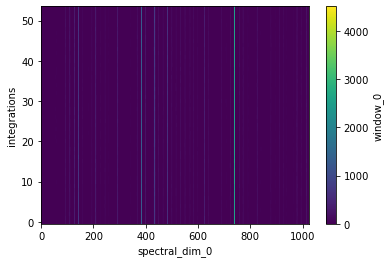

In [11]:
ds.window_0.plot()

In [115]:
p = obsdir / "index_repaired.tab"

In [121]:
df = pd.read_csv(p, quotechar='"', skipinitialspace=True)

/home/maye/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [122]:
from planetarypy.pds.indexes import find_mixed_type_cols

In [123]:
find_mixed_type_cols(df, fix=False)

9
1999-01-07 10:05:02.093
1999-01-07 10:08:34.0
N/A
EUV1999-01-07 17:05:02.000
Unnamed: 6
USTARE
to evaluate EUV and FUV functions.
7
32
0
0.1
0.2


['9',
 '1999-01-07 10:05:02.093',
 '1999-01-07 10:08:34.0',
 'N/A',
 'EUV1999-01-07 17:05:02.000',
 'Unnamed: 6',
 'USTARE',
 'to evaluate EUV and FUV functions.',
 '7',
 '32',
 '0',
 '0.1',
 '0.2']

In [124]:
find_mixed_type_cols??

Signature: find_mixed_type_cols(df, fix=True)
Source:   
def find_mixed_type_cols(df, fix=True):
    """For a given dataframe, find the columns that are of mixed type.

    Tool to help with the performance warning when trying to save a pandas DataFrame as a HDF.
    When a column changes datatype somewhere, pickling occurs, slowing down the reading process of the HDF file.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe to be searched for mixed data-types
    fix : bool
        Switch to control if NaN values in these problem columns should be replaced by the string 'UNKNOWN'
    Returns
    -------
    List of column names that have data type changes within themselves.
    """
    result = []
    for col in df.columns:
        weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
        if len(df[weird]) > 0:
            print(col)
            result.append(col)
    if fix is True:
        for col in result:
            df[col].fi

In [125]:
df.columns

Index(['9', '1999-01-07 10:05:02.093', '1999-01-07 10:08:34.0', 'EUV', 'N/A',
       'EUV1999-01-07 17:05:02.000', 'Unnamed: 6', 'USTARE',
       'to evaluate EUV and FUV functions.', '7', '32', '0', '0.1', '0.2',
       '0.3', '1', '0.4'],
      dtype='object')

In [126]:
index.columns

Index(['FILE_NAME', 'OBSERVATION_TYPE', 'START_TIME', 'STOP_TIME',
       'TARGET_NAME', 'DATA_SET_ID', 'SPACECRAFT_CLOCK_START_COUNT',
       'SPACECRAFT_CLOCK_STOP_COUNT', 'INTEGRATION_DURATION',
       'COMPRESSION_TYPE', 'HI_VOLTAGE_POWER_SUPPLY_STATE',
       'OCCULTATION_PORT_STATE', 'SLIT_STATE', 'TEST_PULSE_STATE', 'ODC_ID',
       'RIGHT_ASCENSION', 'DECLINATION', 'SUB_SOLAR_LATITUDE',
       'SUB_SOLAR_LONGITUDE', 'SUB_SPACECRAFT_LATITUDE',
       'SUB_SPACECRAFT_LONGITUDE', 'PHASE_ANGLE', 'EMISSION_ANGLE',
       'SOLAR_INCIDENCE_ANGLE', 'CENTRAL_BODY_DISTANCE', 'DWELL_TIME',
       'H_LEVEL', 'D_LEVEL', 'filename'],
      dtype='object')

In [133]:
index[index.filename.str.startswith("EUV")].iloc[0]

FILE_NAME                        /COUVIS_0001/DATA/D1999_007/EUV1999_007_17_05.LBL
OBSERVATION_TYPE                                                            USTARE
START_TIME                                              1999-01-07 17:05:01.949000
STOP_TIME                                               1999-01-07 17:08:37.949000
TARGET_NAME                                                                    NaN
DATA_SET_ID                                                  CO-J-UVIS-2-SPEC-V1.2
SPACECRAFT_CLOCK_START_COUNT                                      1/1294420183.000
SPACECRAFT_CLOCK_STOP_COUNT                                                    UNK
INTEGRATION_DURATION                                                           4.0
COMPRESSION_TYPE                                                              NONE
HI_VOLTAGE_POWER_SUPPLY_STATE                                                  OFF
OCCULTATION_PORT_STATE                                                      CLOSED
SLIT

In [127]:
obs.head()

filename  slit    nx  ny   nz  int  odcid  x1    x2  y1  y2  \
0  EUV1999_016_19_47_15     2  1024  64    2   60     12   0  1023   0  63   
1  EUV1999_016_19_49_06     2  1024   1  123    1     13   0  1023   0  63   
2  EUV1999_016_20_08_10     2     1  64  399    1     11   0  1023   0  63   
3  EUV1999_016_20_16_14     2  1024  64    2   60     12   0  1023   0  63   
4  EUV1999_016_20_18_06     2  1024   1  123    1     13   0  1023   0  63   

      name  
0  alp vir  
1  alp vir  
2  alp vir  
3  alp vir  
4  alp vir

In [ ]:
cols = ["index start_time stop_time detector target obsid_time unknown type comment "]